# PCA on each ROI

In [4]:
import os
import numpy as np
from nilearn import image
from nilearn.image import load_img
from nilearn.masking import apply_mask

In [11]:
img = load_img("data/sub-001/func/swasub-001_task-stroop_bold.nii")

In [12]:
rois = [i for i in os.listdir("ROIs") if i.endswith(".nii.gz")]

In [13]:
rois

['left_manual.nii.gz',
 'right_retrieval.nii.gz',
 'right_imaginal.nii.gz',
 'left_visual.nii.gz',
 'left_imaginal.nii.gz',
 'right_manual.nii.gz',
 'left_retrieval.nii.gz',
 'right_visual.nii.gz']

We want to extract the 1st component from PCA in each ROI, ending up with 8 time series in total.

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [15]:
mask = load_img(os.path.join("ROIs", rois[0]))

In [16]:
data = apply_mask(img, image.index_img(mask, 0))

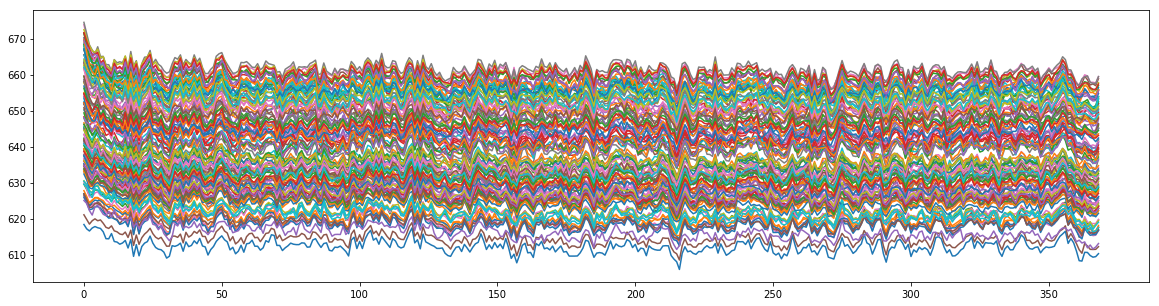

In [18]:
fig = plt.figure()
plt.plot(data)
fig.set_size_inches(20, 5)

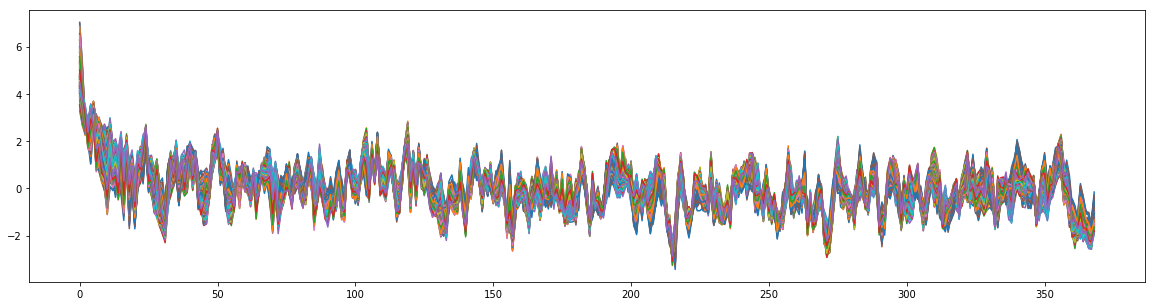

In [17]:
# normalize data
scaler = StandardScaler()
scaler.fit(data)
normalized = scaler.transform(data)

fig = plt.figure()
plt.plot(normalized)
fig.set_size_inches(20, 5)

In [19]:
pca = PCA(n_components=1)

In [20]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
projected = pca.transform(data)

In [22]:
var_projected = np.sum(np.var(projected, axis=0))
var_original = np.sum(np.var(data, axis=0))
var_projected / var_original

0.8641307550150871